In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [12]:
mental_health = pd.read_csv('/content/Mental Health Dataset.csv')
mental_health.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [13]:
mental_health.tail()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292363,2/1/2016 23:04,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


| Understanding Features:

Timestamp: A record of a particular date and time. This could be when an observation or data point was recorded regarding someone's mental health.

Gender: The classification of a person as male or female.

Country: The place where a person lives. This is relevant because mental health resources and cultural attitudes toward mental health can vary by country.

Occupation: A person's usual or principal work or business. Occupation can influence stress levels and access to mental health resources.

Self-employed: Indicates whether a person is working for themselves or has their own business, rather than working for an employer.

Family history: A record of the relationships among family members along with their medical histories. Family history of mental health issues can indicate potential genetic or environmental factors.

Treatment: Indicates whether a person is currently undergoing treatment for mental health issues.

Growing Stress: Indicates whether a person's stress level is increasing over time.

Changes Habits: This seems incomplete. It could refer to changes in behavior or habits that may indicate shifts in mental health.

Mental_Health_History: A record of a person's mental health history, including any previous diagnoses or treatments.

Mood_Swings: Fluctuations in a person's mood, which can be indicative of various mental health conditions.

Coping_Struggles: Difficulties a person may have in coping with stressors or mental health challenges.

Work_Interest: Level of interest or engagement in work or activities, which can be affected by mental health.

Social_Weakness: Weaknesses or difficulties in social interactions or relationships, which can be impacted by mental health issues.

Mental_Health_Interview: It seems like this could refer to a structured interview or assessment related to mental health.

Care_Options: Options available for seeking care or treatment for mental health issues, such as therapy, medication, or support groups.

In [14]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [15]:
print("Unique values\n")
mental_health.nunique()


Unique values



,0
Timestamp,580
Gender,2
Country,35
Occupation,5
self_employed,2
family_history,2
treatment,2
Days_Indoors,5
Growing_Stress,3
Changes_Habits,3


In [16]:
# Check the duplicate values
print('Known observations:', len(mental_health.index))
print('Unique observations:',len(mental_health.drop_duplicates().index))

Known observations: 292364
Unique observations: 290051


In [17]:
mental_health.duplicated().sum()

2313

In [18]:
# Drop the duplicated rows
mental_health.drop_duplicates(inplace = True)
mental_health

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [19]:
mental_health.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5193
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [20]:
# fill the null values
mental_health['self_employed'].fillna(mental_health['self_employed'].mode()[0], inplace=True)
mental_health

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [21]:
# chek once again null values
mental_health.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [22]:
mental_health.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [23]:
#Summary of Categorical Features.
mental_health.describe().T

,count,unique,top,freq
Timestamp,290051,580,8/27/2014 11:43,2381
Gender,290051,2,Male,237900
Country,290051,35,United States,169112
Occupation,290051,5,Housewife,65906
self_employed,290051,2,No,260904
family_history,290051,2,No,175518
treatment,290051,2,Yes,146184
Days_Indoors,290051,5,1-14 days,63113
Growing_Stress,290051,3,Maybe,99300
Changes_Habits,290051,3,Yes,108788


In [24]:
mental_health.count()

,0
Timestamp,290051
Gender,290051
Country,290051
Occupation,290051
self_employed,290051
family_history,290051
treatment,290051
Days_Indoors,290051
Growing_Stress,290051
Changes_Habits,290051


In [25]:
mental_health.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2381,237900,169112,65906,260904,175518,146184,63113,99300,108788,103313,100384,153031,105012,102577,229889,117614


## | Visualization

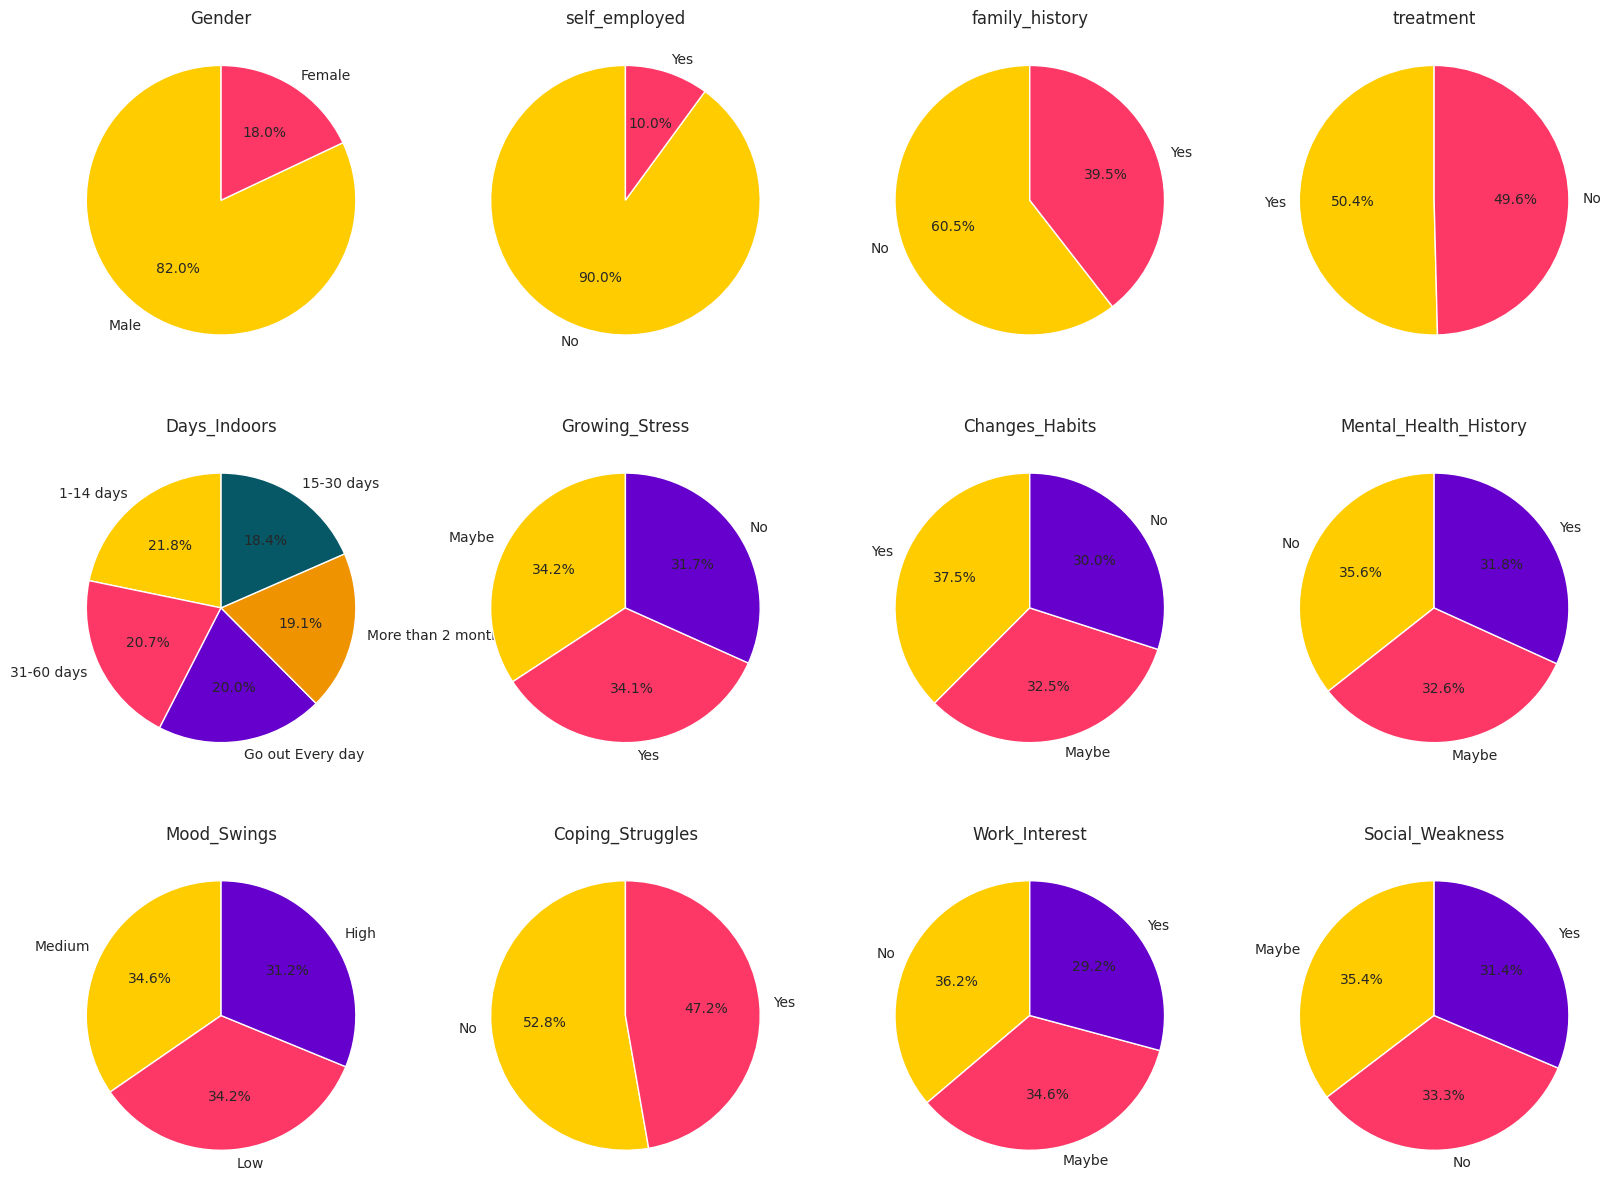

In [26]:
sns.set_style("whitegrid")

cols_to_visualize = ['Gender','self_employed','family_history', 'treatment', 'Days_Indoors',
                     'Growing_Stress','Changes_Habits', 'Mental_Health_History', 'Mood_Swings','Coping_Struggles', 'Work_Interest', 'Social_Weakness']
counts = []

for col in cols_to_visualize:# for i in day_in.containers:
#     day_in.bar_label(i)
    counts.append(mental_health[col].value_counts())

fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.flatten()

for i, (col, count) in enumerate(zip(cols_to_visualize, counts)):
    axs[i].pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors = ['#ffcc00','#fd3866','#6600cc','#f09300','#065867'])
    axs[i].set_title(col)
    axs[i].grid(False)
# for i in data.containers:
#     data.bar_label(i)

plt.show()

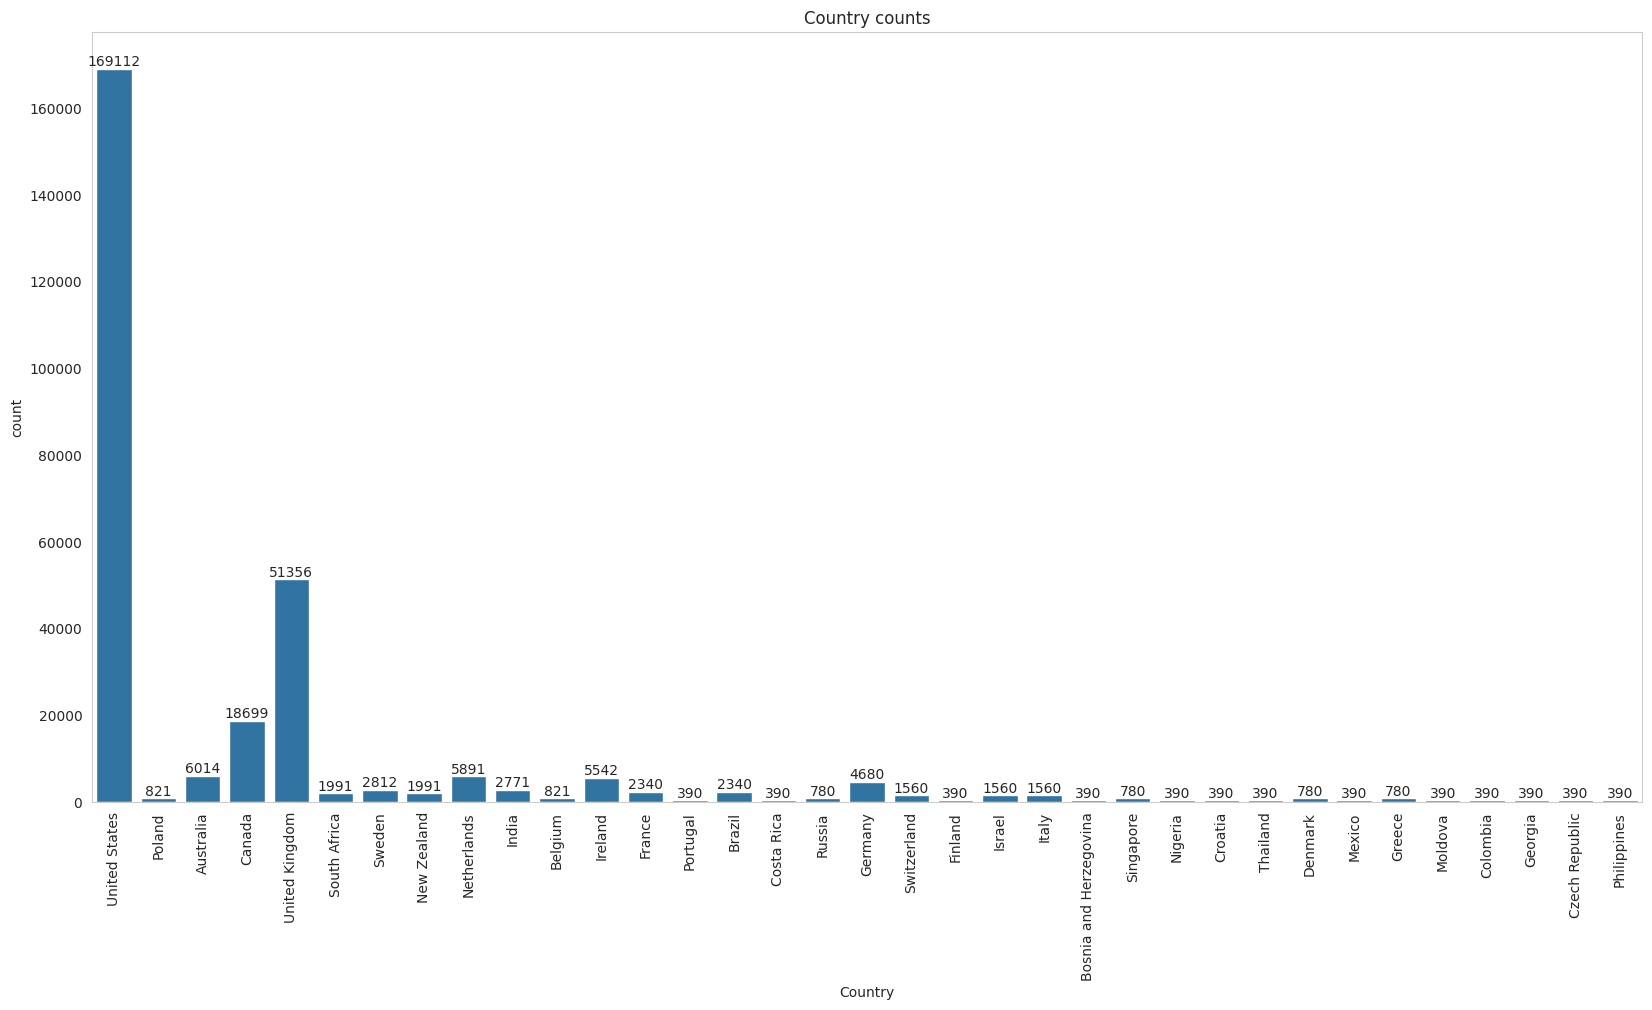

In [27]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x='Country', data=mental_health)
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i)
    ax.set_title('Country counts')
    ax.grid(False)
# plt.show()

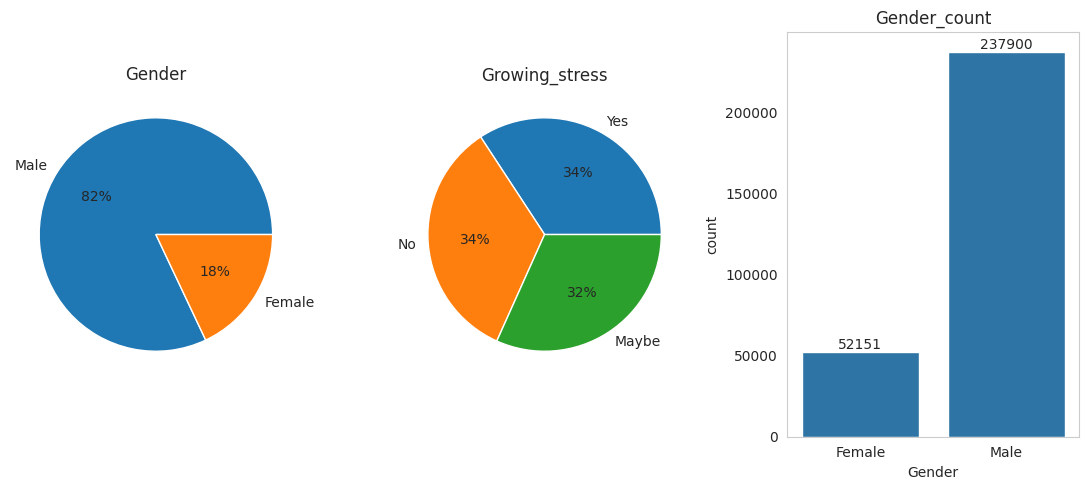

In [28]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(11, 5)
axes[0].pie(mental_health['Gender'].value_counts(), labels = ['Male','Female'],autopct='%.0f%%')
axes[0].set_title('Gender')
# plt.subplots(1,2)
axes[1].pie(mental_health['Growing_Stress'].value_counts(),labels = ['Yes','No','Maybe'],autopct='%.0f%%')
axes[1].set_title('Growing_stress')
b = sns.countplot(x = 'Gender', data = mental_health,ax=axes[2],saturation=0.8)
for i in b.containers:
    b.bar_label(i)
    b.set_title('Gender_count')
    b.grid(False)
# sns.countplot(x='Gender', data=mental_health)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Growing stress by Gender ')

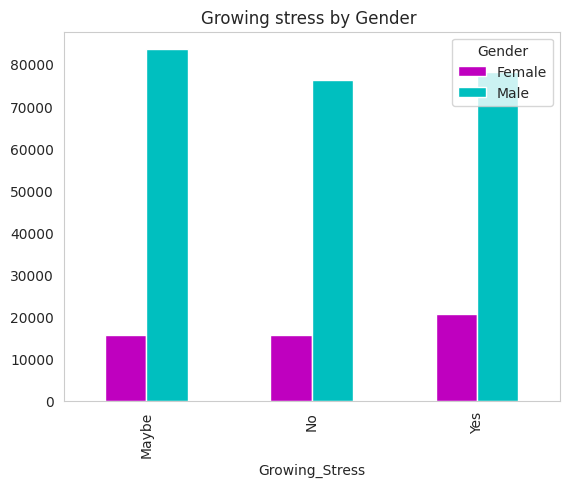

In [29]:
df = pd.crosstab(mental_health.Growing_Stress,mental_health.Gender).plot(kind = 'bar',color = ['m','c'])
df.grid(False)
df.set_title('Growing stress by Gender ')

In [30]:
color_map = {'Yes': 'rgb(217, 145, 38)', 'No': 'rgb(163, 41, 102)', 'Maybe': 'rgb(115, 0, 153)'}
count = mental_health.groupby(['Growing_Stress', 'Days_Indoors']).size().reset_index(name='Count')
fig = px.bar(count,x ='Count',y = 'Days_Indoors',color = 'Growing_Stress',color_discrete_map=color_map, width=800, orientation='h')
fig.update_layout(title='Distribution of Growing Stress by Days_Indoors',title_font_size=20,title_font_family='Arial')
fig.show()

In [31]:
color_map = {'Yes': 'rgb(217, 145, 38)', 'No': 'rgb(163, 41, 102)', 'Maybe': 'rgb(115, 0, 153)'}
count_data = mental_health.groupby(['Growing_Stress', 'Occupation']).size().reset_index(name='Count')
fig = px.bar(count_data,x ='Count',y = 'Occupation',color = 'Growing_Stress',color_discrete_map=color_map, width=800, orientation='h')
fig.update_layout(title='Distribution of Growing Stress by Occupations',title_font_size=20,title_font_family='Arial')
fig.show()

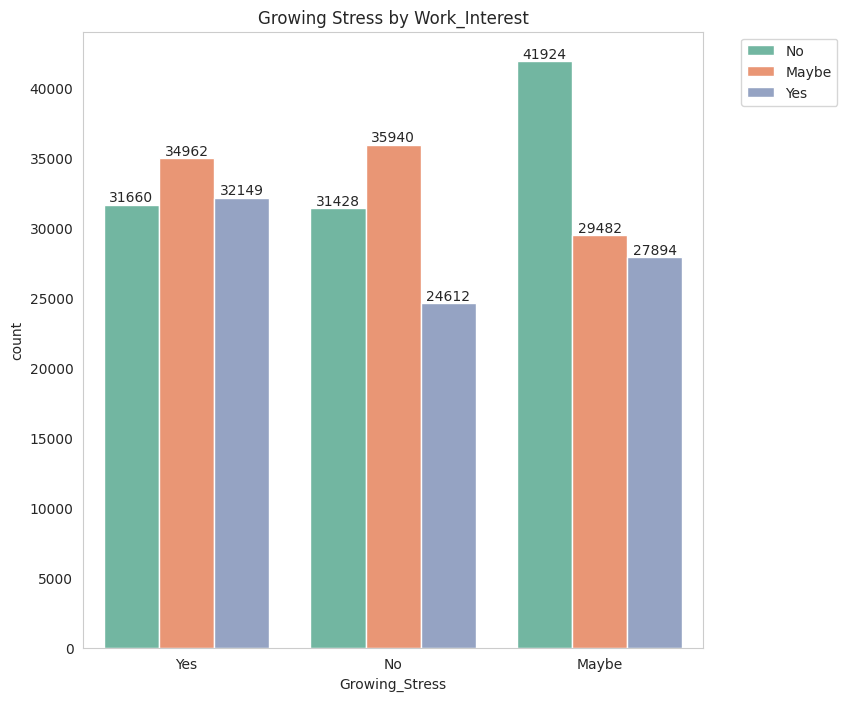

In [32]:
plt.figure(figsize=(8, 8))
ax1 = sns.countplot(x='Growing_Stress', hue='Work_Interest', data=mental_health,palette="Set2")
plt.title('Growing Stress by Work_Interest')
plt.grid(False)
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

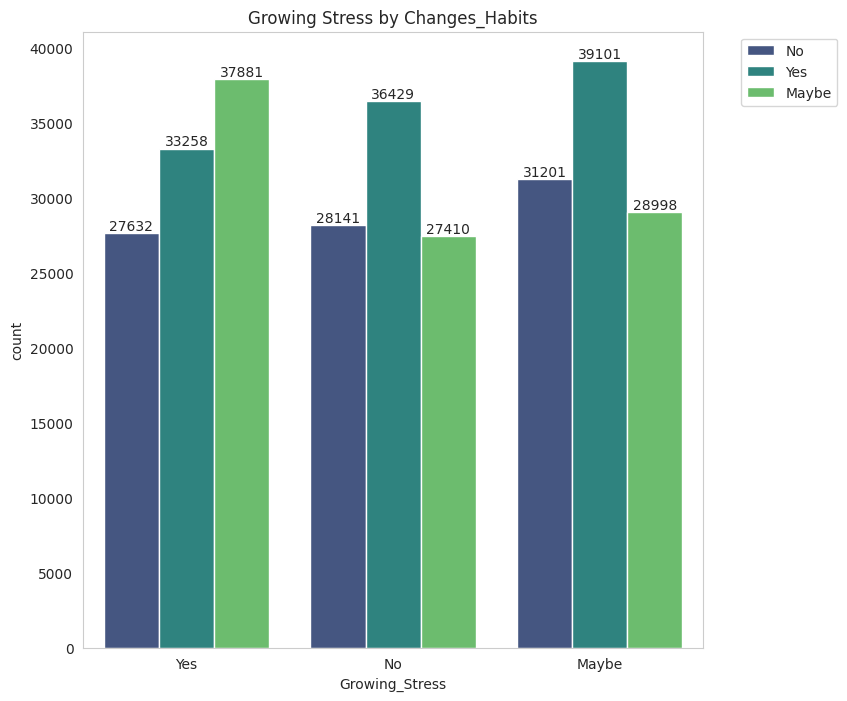

In [33]:
plt.figure(figsize=(8, 8))
ax2 = sns.countplot(x='Growing_Stress', hue='Changes_Habits', data=mental_health,palette="viridis")
plt.title('Growing Stress by Changes_Habits')
plt.grid(False)
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [34]:
filter_data = mental_health[(mental_health['Gender'] == 'Female') & (mental_health['Country'] == 'United States') & (mental_health['Occupation'] == 'Student')]
filter_data

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
121,8/27/2014 11:29,Female,United States,Student,No,No,Yes,Go out Every day,No,Yes,No,Medium,Yes,Maybe,No,No,Not sure
122,8/27/2014 11:31,Female,United States,Student,No,Yes,Yes,Go out Every day,No,Yes,No,Medium,Yes,Maybe,No,No,No
123,8/27/2014 11:32,Female,United States,Student,No,Yes,Yes,Go out Every day,No,Yes,No,Medium,Yes,Maybe,No,No,Yes
124,8/27/2014 11:37,Female,United States,Student,No,Yes,Yes,Go out Every day,No,Yes,No,Medium,Yes,Maybe,No,Maybe,Yes
125,8/27/2014 11:43,Female,United States,Student,No,Yes,Yes,Go out Every day,No,Yes,No,Medium,Yes,Maybe,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51657,9/8/2014 21:30,Female,United States,Student,No,No,Yes,1-14 days,Maybe,Maybe,Maybe,Low,No,Yes,No,No,Yes
51658,9/20/2014 13:51,Female,United States,Student,No,Yes,Yes,1-14 days,Maybe,Maybe,Maybe,Low,No,Yes,No,No,No
51659,10/2/2014 21:25,Female,United States,Student,No,Yes,Yes,1-14 days,Maybe,Maybe,Maybe,Low,No,Yes,No,No,Not sure
51662,2/21/2015 5:11,Female,United States,Student,No,No,Yes,1-14 days,Maybe,Maybe,Maybe,Low,No,Yes,No,No,No


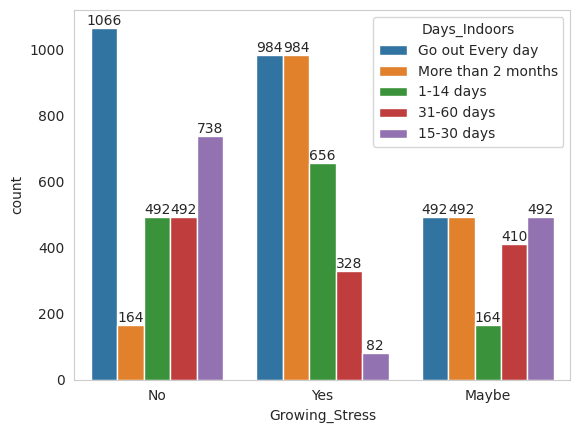

In [35]:
day_in = sns.countplot(x='Growing_Stress',hue = 'Days_Indoors', data=filter_data)
for i in day_in.containers:
    day_in.bar_label(i)
    day_in.grid(False)

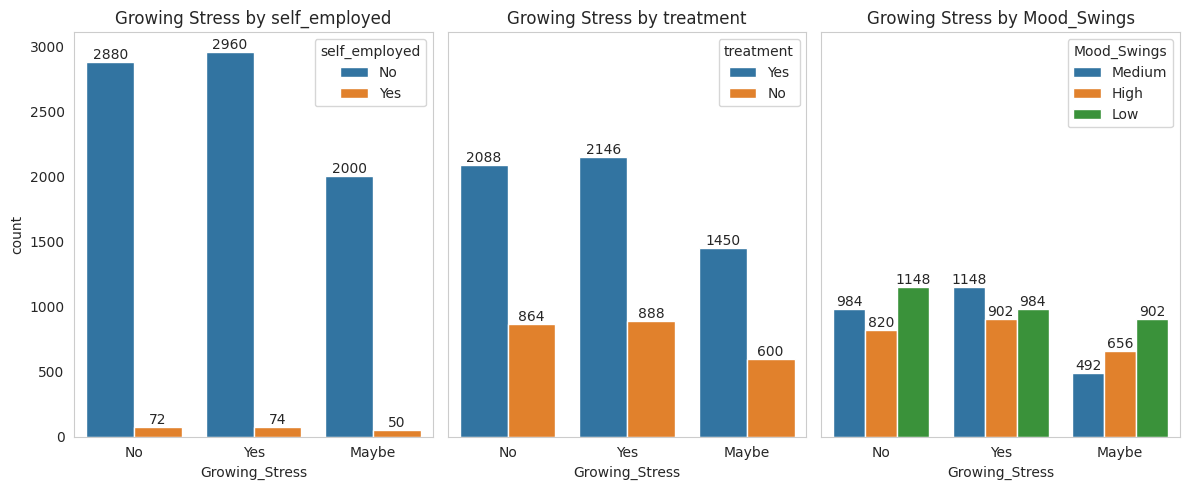

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
sns.countplot(x='Growing_Stress', hue='self_employed', data=filter_data, ax=axs[0])
axs[0].set_title('Growing Stress by self_employed')
axs[0].grid(False)
for container in axs[0].containers:
    axs[0].bar_label(container)
sns.countplot(x='Growing_Stress', hue='treatment', data=filter_data, ax=axs[1])
axs[1].set_title('Growing Stress by treatment')
axs[1].grid(False)
for container in axs[1].containers:
    axs[1].bar_label(container)
sns.countplot(x='Growing_Stress', hue='Mood_Swings', data=filter_data, ax=axs[2])
axs[2].set_title('Growing Stress by Mood_Swings')
axs[2].grid(False)
for container in axs[2].containers:
    axs[2].bar_label(container)
plt.tight_layout()
plt.show()

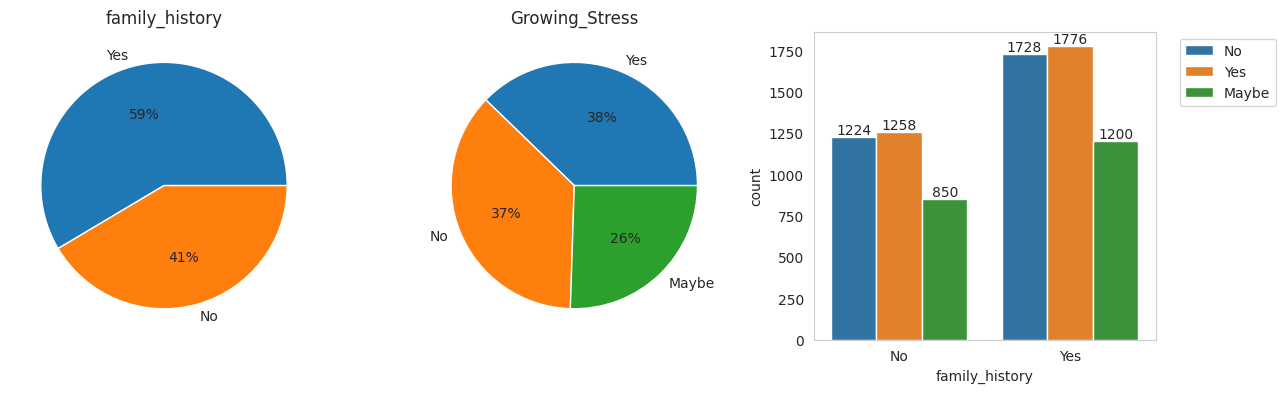

In [37]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 4)
axes[0].pie(filter_data['family_history'].value_counts(),labels = filter_data['family_history'].value_counts().index, autopct='%.0f%%')
axes[0].set_title('family_history')
axes[1].pie(filter_data['Growing_Stress'].value_counts(), labels = filter_data['Growing_Stress'].value_counts().index,autopct='%.0f%%')
axes[1].set_title('Growing_Stress')
day_in = sns.countplot(x='family_history',hue = 'Growing_Stress', data=filter_data)
for i in day_in.containers:
    day_in.bar_label(i,label_type='edge')
    day_in.grid(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [38]:
filter_data_m = mental_health[(mental_health['Gender'] == 'Male') & (mental_health['Country'] == 'United States') & (mental_health['Occupation'] == 'Student')]
filter_data_m

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
57436,8/27/2014 11:30,Male,United States,Student,No,No,No,31-60 days,Maybe,Maybe,No,Medium,Yes,Yes,Maybe,Yes,No
57437,8/27/2014 11:31,Male,United States,Student,No,Yes,No,31-60 days,Maybe,Maybe,No,Medium,Yes,Yes,Maybe,No,Not sure
57439,8/27/2014 11:32,Male,United States,Student,No,No,Yes,31-60 days,Maybe,Maybe,No,Medium,Yes,Yes,Maybe,No,No
57440,8/27/2014 11:33,Male,United States,Student,No,Yes,No,31-60 days,Maybe,Maybe,No,Medium,Yes,Yes,Maybe,No,Not sure
57443,8/27/2014 11:34,Male,United States,Student,No,No,Yes,31-60 days,Maybe,Maybe,No,Medium,Yes,Yes,Maybe,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291743,5/6/2015 16:55,Male,United States,Student,No,No,No,More than 2 months,Yes,Maybe,No,High,Yes,Yes,Maybe,Maybe,Not sure
291744,7/27/2015 23:25,Male,United States,Student,Yes,Yes,Yes,More than 2 months,Yes,Maybe,No,High,Yes,Yes,Maybe,Maybe,Not sure
291746,8/25/2015 19:59,Male,United States,Student,No,Yes,No,More than 2 months,Yes,Maybe,No,High,Yes,Yes,Maybe,No,No
291747,9/26/2015 1:07,Male,United States,Student,No,Yes,Yes,More than 2 months,Yes,Maybe,No,High,Yes,Yes,Maybe,No,Yes


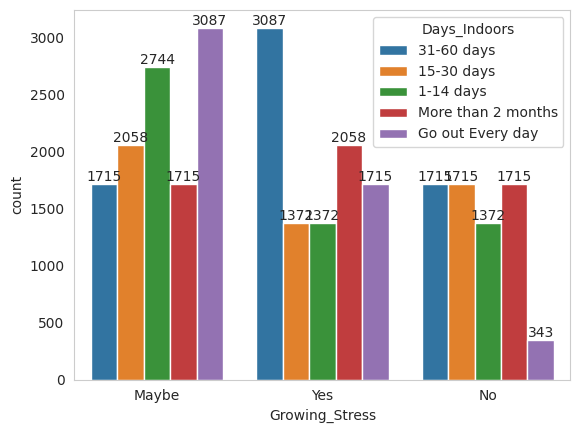

In [39]:
# fig,axis = plt.subplot()
day_in = sns.countplot(x='Growing_Stress',hue = 'Days_Indoors', data=filter_data_m)
for i in day_in.containers:
    day_in.bar_label(i,label_type='edge')
    day_in.grid(False)

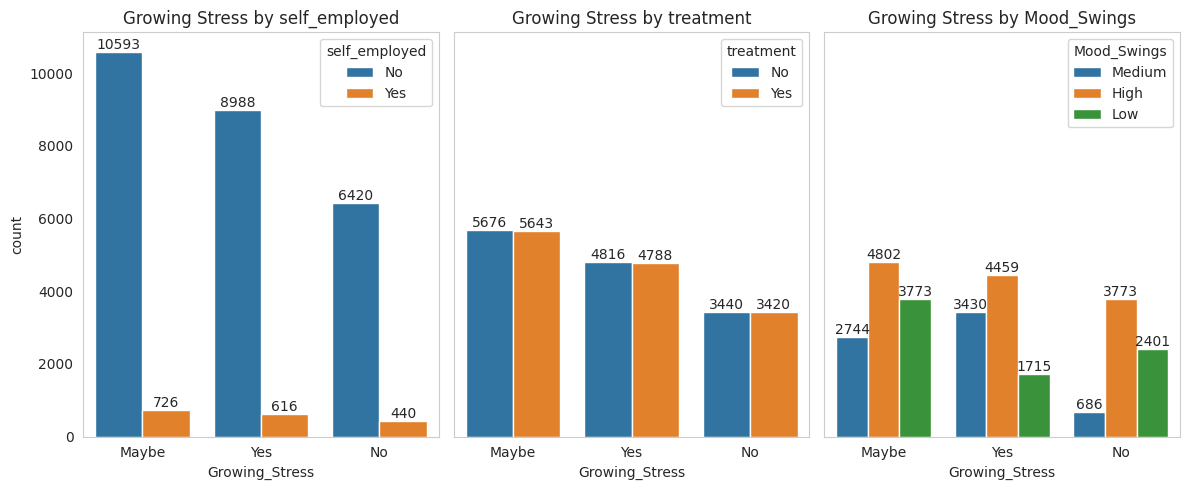

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
sns.countplot(x='Growing_Stress', hue='self_employed', data=filter_data_m, ax=axs[0])
axs[0].set_title('Growing Stress by self_employed')
axs[0].grid(False)
for container in axs[0].containers:
    axs[0].bar_label(container)
sns.countplot(x='Growing_Stress', hue='treatment', data=filter_data_m, ax=axs[1])
axs[1].set_title('Growing Stress by treatment')
axs[1].grid(False)
for container in axs[1].containers:
    axs[1].bar_label(container)
sns.countplot(x='Growing_Stress', hue='Mood_Swings', data=filter_data_m, ax=axs[2])
axs[2].set_title('Growing Stress by Mood_Swings')
axs[2].grid(False)
for container in axs[2].containers:
    axs[2].bar_label(container)
plt.tight_layout()
plt.show()

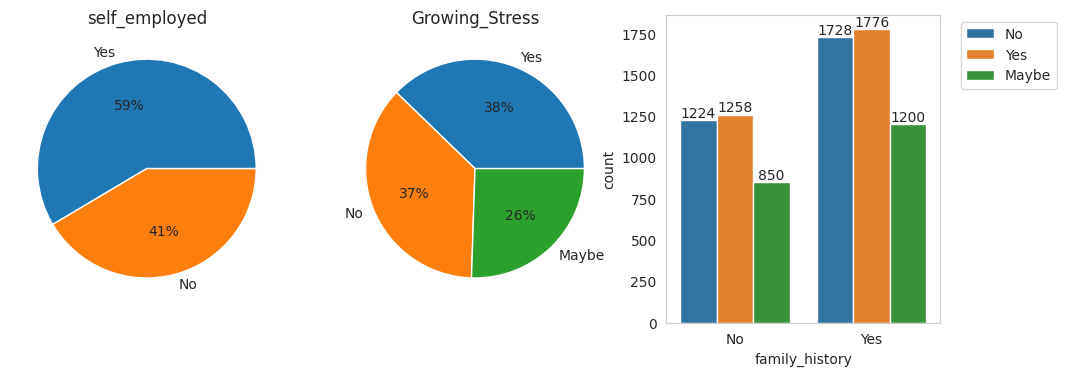

In [41]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(12, 4)
axes[0].pie(filter_data['family_history'].value_counts(),labels = filter_data['family_history'].value_counts().index, autopct='%.0f%%',)
axes[0].set_title('self_employed')
axes[1].pie(filter_data['Growing_Stress'].value_counts(), labels = filter_data['Growing_Stress'].value_counts().index,autopct='%.0f%%')
axes[1].set_title('Growing_Stress')
day_in = sns.countplot(x='family_history',hue = 'Growing_Stress', data=filter_data)
for i in day_in.containers:
    day_in.bar_label(i,label_type='edge')
    day_in.grid(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Statistical Test conditions

In [42]:
cols= ['Gender','Country','Occupation','self_employed','family_history', 'treatment', 'Days_Indoors',
                    'Changes_Habits', 'Mental_Health_History', 'Mood_Swings','Coping_Struggles', 'Work_Interest', 'Social_Weakness','mental_health_interview','care_options']
def calculate_chi_square(column1,column2 = 'Growing_Stress'):
    print(f"Correlation between **{column1}** and **{column2}**\n")
    crosstab = pd.crosstab(mental_health[column1],mental_health[column2])
    stat,p,dof,expected = chi2_contingency(crosstab, correction = True)
    print(f'P_value = {p}, degrees of freedom =  {dof}')
    prob = 0.95
    critical = chi2.ppf(prob,dof)
    print(f'probability = %.3f, critical = %.3f, stat = %.3f' %(prob,critical,stat) )
    if stat >= critical:
        print('dependent(reject(Ho))')
    else:
        print('independent(accept(Ho))')
    alpha = 1.0 - prob
    print(f'significance = %.3f, p-value = %.3f' %(alpha,p))
    if p <= alpha:
        print('dependent(reject(Ho))')
    else:
        print('independent(accept(Ho))')
    print('\n-----------------------------------\n')
print('** Chi_square Correlation between Dichotomous features with Target:Growing stress**\n')
for col in cols:
    calculate_chi_square(col)

** Chi_square Correlation between Dichotomous features with Target:Growing stress**

Correlation between **Gender** and **Growing_Stress**

P_value = 3.0720439382861886e-206, degrees of freedom =  2
probability = 0.950, critical = 5.991, stat = 946.420
dependent(reject(Ho))
significance = 0.050, p-value = 0.000
dependent(reject(Ho))

-----------------------------------

Correlation between **Country** and **Growing_Stress**

P_value = 0.9999786869737336, degrees of freedom =  68
probability = 0.950, critical = 88.250, stat = 30.316
independent(accept(Ho))
significance = 0.050, p-value = 1.000
independent(accept(Ho))

-----------------------------------

Correlation between **Occupation** and **Growing_Stress**

P_value = 0.0, degrees of freedom =  8
probability = 0.950, critical = 15.507, stat = 3542.375
dependent(reject(Ho))
significance = 0.050, p-value = 0.000
dependent(reject(Ho))

-----------------------------------

Correlation between **self_employed** and **Growing_Stress**

P_

Conditional probability:

Probability of Gender given Growing_Stress:

Column conditional probability:
Growing_Stress     Maybe        No       Yes
Gender                                      
Female          0.158409  0.171015  0.209485
Male            0.841591  0.828985  0.790515

------------------------------------------



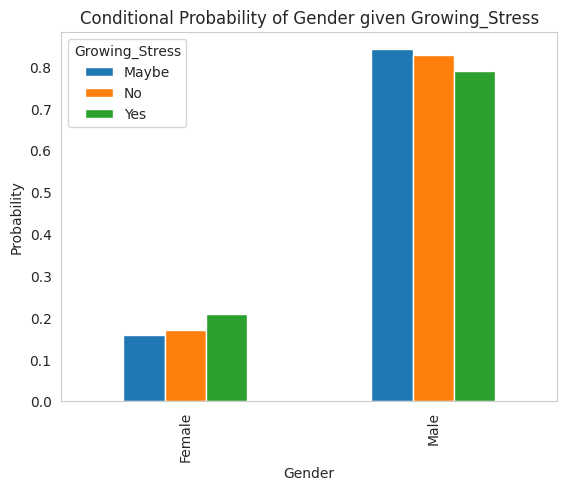

Probability of Occupation given Growing_Stress:

Column conditional probability:
Growing_Stress     Maybe        No       Yes
Occupation                                  
Business        0.170534  0.153577  0.189924
Corporate       0.170534  0.217319  0.240556
Housewife       0.241712  0.243792  0.197224
Others          0.184038  0.205316  0.154043
Student         0.233182  0.179996  0.218252

------------------------------------------



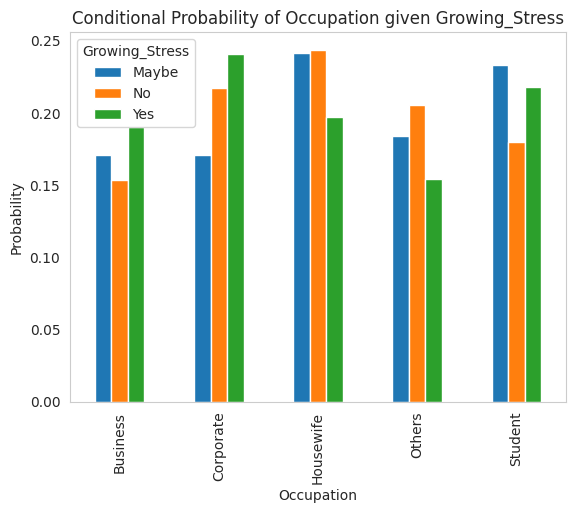

Probability of self_employed given Growing_Stress:

Column conditional probability:
Growing_Stress     Maybe        No       Yes
self_employed                               
No              0.898399  0.899054  0.901054
Yes             0.101601  0.100946  0.098946

------------------------------------------



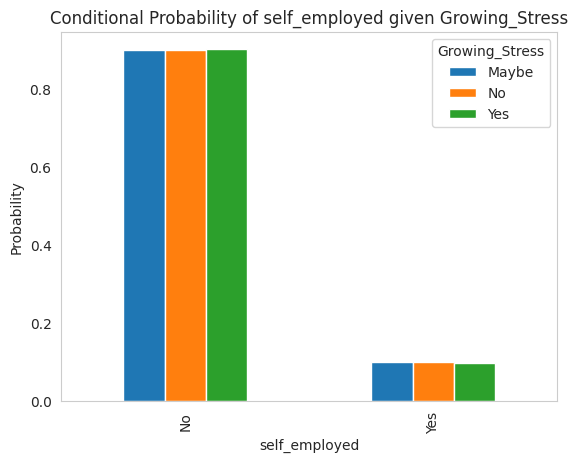

Probability of family_history given Growing_Stress:

Column conditional probability:
Growing_Stress     Maybe       No       Yes
family_history                             
No              0.610564  0.60736  0.597584
Yes             0.389436  0.39264  0.402416

------------------------------------------



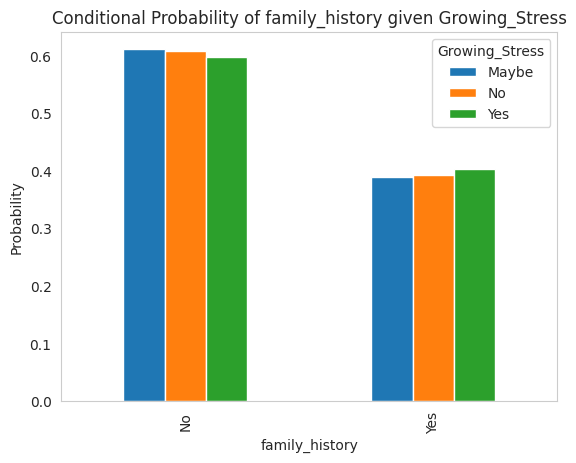

Probability of treatment given Growing_Stress:

Column conditional probability:
Growing_Stress     Maybe        No       Yes
treatment                                   
No              0.500967  0.498043  0.489121
Yes             0.499033  0.501957  0.510879

------------------------------------------



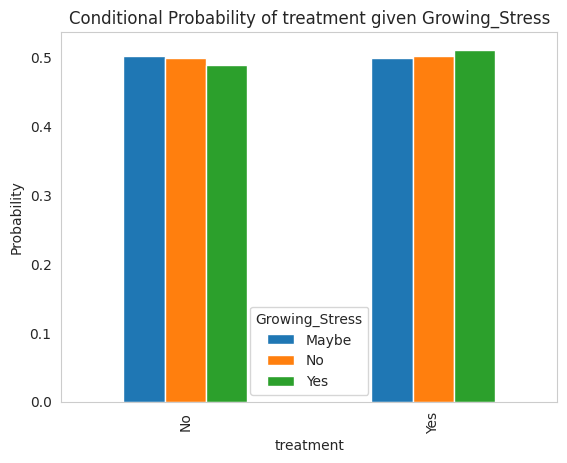

Probability of Days_Indoors given Growing_Stress:

Column conditional probability:
Growing_Stress         Maybe        No       Yes
Days_Indoors                                    
1-14 days           0.208711  0.217319  0.226777
15-30 days          0.175408  0.190628  0.187525
31-60 days          0.183988  0.227897  0.210851
Go out Every day    0.219627  0.206578  0.173847
More than 2 months  0.212266  0.157578  0.201000

------------------------------------------



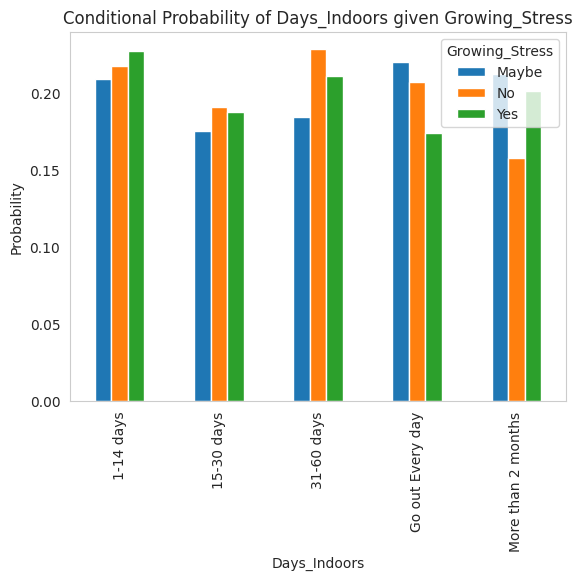

Probability of Changes_Habits given Growing_Stress:

Column conditional probability:
Growing_Stress     Maybe        No       Yes
Changes_Habits                              
Maybe           0.292024  0.298000  0.383524
No              0.314209  0.305947  0.279758
Yes             0.393766  0.396053  0.336718

------------------------------------------



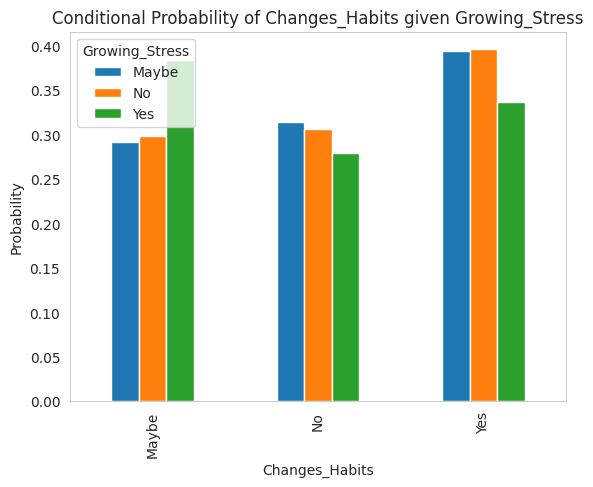

Probability of Mental_Health_History given Growing_Stress:

Column conditional probability:
Growing_Stress            Maybe        No       Yes
Mental_Health_History                              
Maybe                  0.322739  0.324418  0.330340
No                     0.363202  0.369635  0.336617
Yes                    0.314058  0.305947  0.333043

------------------------------------------



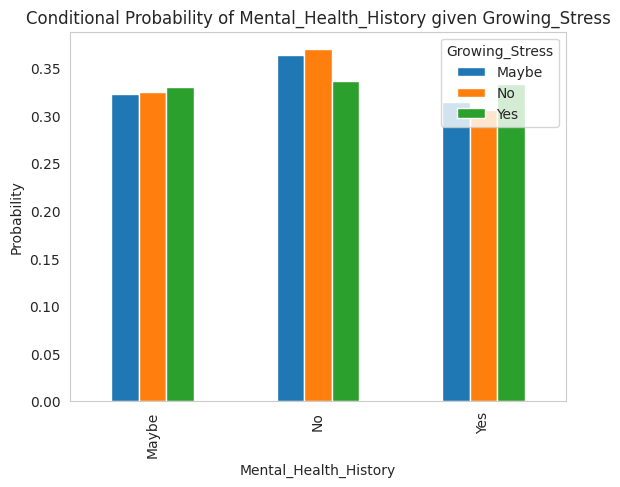

Probability of Growing_Stress given Growing_Stress:

Column conditional probability:
Growing_Stress  Maybe   No  Yes
Growing_Stress                 
Maybe             1.0  0.0  0.0
No                0.0  1.0  0.0
Yes               0.0  0.0  1.0

------------------------------------------



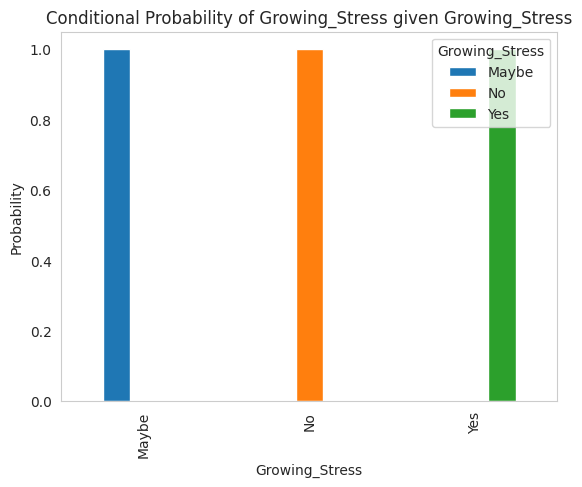

Probability of Mood_Swings given Growing_Stress:

Column conditional probability:
Growing_Stress     Maybe        No       Yes
Mood_Swings                                 
High            0.314159  0.332420  0.290885
Low             0.360665  0.345738  0.319416
Medium          0.325176  0.321842  0.389699

------------------------------------------



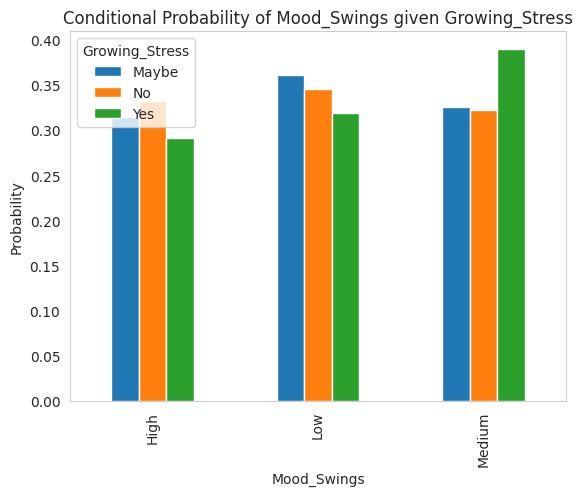

Probability of Coping_Struggles given Growing_Stress:

Column conditional probability:
Growing_Stress       Maybe     No       Yes
Coping_Struggles                           
No                0.552316  0.502  0.526592
Yes               0.447684  0.498  0.473408

------------------------------------------



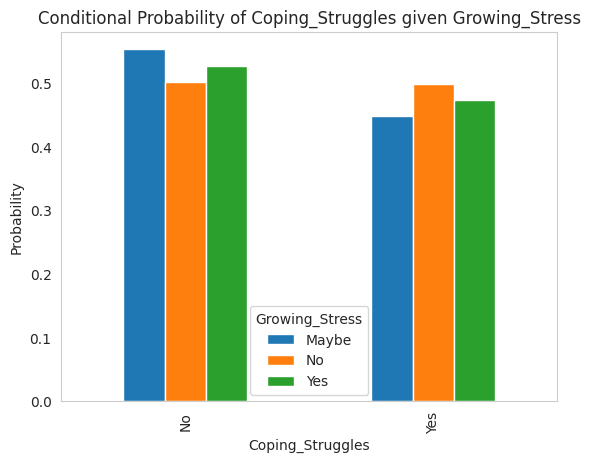

Probability of Work_Interest given Growing_Stress:

Column conditional probability:
Growing_Stress     Maybe        No       Yes
Work_Interest                               
Maybe           0.296898  0.390737  0.353970
No              0.422195  0.341683  0.320539
Yes             0.280906  0.267580  0.325490

------------------------------------------



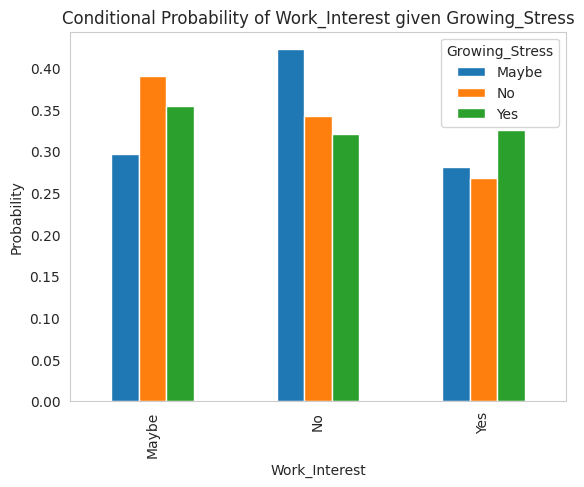

Probability of Social_Weakness given Growing_Stress:

Column conditional probability:
Growing_Stress      Maybe        No       Yes
Social_Weakness                              
Maybe            0.354673  0.352316  0.353869
No               0.347210  0.343053  0.308238
Yes              0.298117  0.304631  0.337893

------------------------------------------



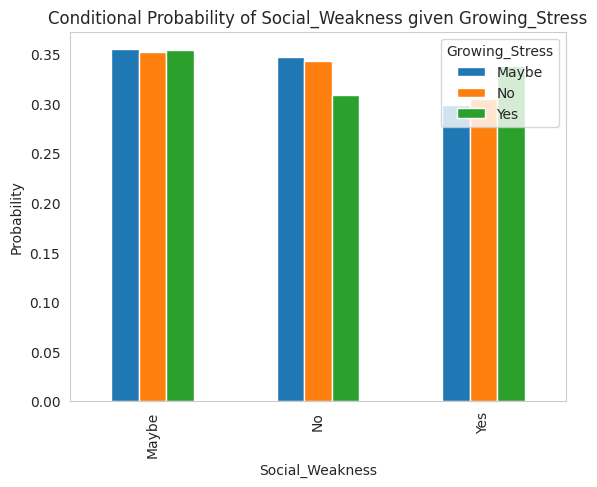

Probability of mental_health_interview given Growing_Stress:

Column conditional probability:
Growing_Stress              Maybe        No       Yes
mental_health_interview                              
Maybe                    0.179960  0.178626  0.174555
No                       0.789758  0.791422  0.796499
Yes                      0.030282  0.029952  0.028946

------------------------------------------



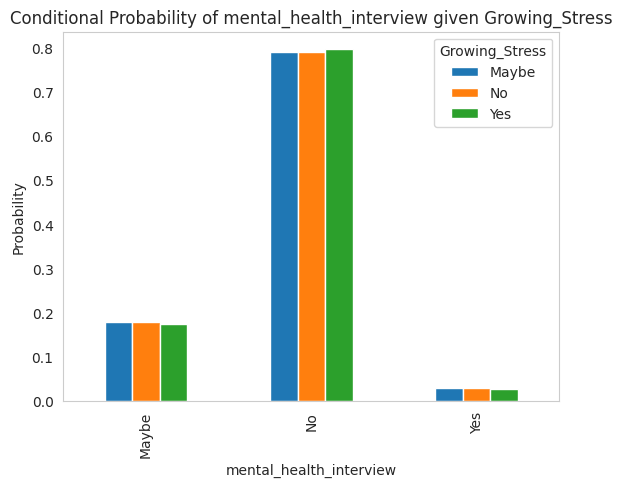

Probability of care_options given Growing_Stress:

Column conditional probability:
Growing_Stress     Maybe        No       Yes
care_options                                
No              0.408741  0.406828  0.400988
Not sure        0.266284  0.267123  0.269684
Yes             0.324975  0.326049  0.329327

------------------------------------------



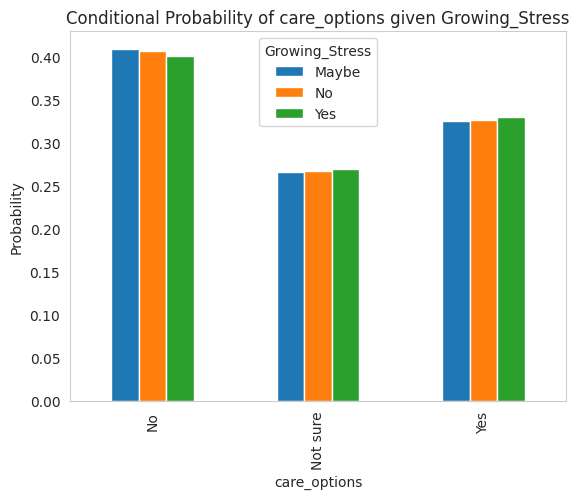

In [43]:
cols = mental_health[['Gender', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors',
                     'Changes_Habits', 'Mental_Health_History', 'Growing_Stress', 'Mood_Swings', 'Coping_Struggles',
                     'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']]

def calculate_conditional_pro(feature1, feature2='Growing_Stress'):
    column = pd.crosstab(index=mental_health[feature1], columns=mental_health[feature2], normalize='columns')
    print(f"Probability of {feature1} given {feature2}:\n")
    print(f'Column conditional probability:\n{column}')
    print('\n------------------------------------------\n')
    return column

print('Conditional probability:\n')
for con in cols:
    data = calculate_conditional_pro(con)
    data.plot(kind='bar')
    plt.title(f"Conditional Probability of {con} given Growing_Stress")
    plt.xlabel(con)
    plt.ylabel("Probability")
    plt.grid(False)
    plt.show()

In [44]:
# Create DataFrame
df = pd.DataFrame(mental_health)

# Selected features
selected_features = ['Timestamp','Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors',
                     'Changes_Habits', 'Mental_Health_History', 'Growing_Stress', 'Mood_Swings', 'Coping_Struggles',
                     'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']

# Calculate the frequency of each feature value given each target value
conditional_probs = {feature: {} for feature in selected_features}

for feature in selected_features:
    for target in df['Growing_Stress'].unique():
        conditional_probs[feature][target] = {}
        for value in df[feature].unique():
            prob = df[(df[feature] == value) & (df['Growing_Stress'] == target)].shape[0] / df[df['Growing_Stress'] == target].shape[0]
            conditional_probs[feature][target][value] = prob

# Calculate the average conditional probability for each feature for 'Yes' and 'No'
avg_cond_probs = {}
total_avg_cond_prob = {}

for target in df['Growing_Stress'].unique():
    avg_cond_probs[target] = {}
    total_avg_cond_prob[target] = 0
    for feature in selected_features:
        avg_cond_probs[target][feature] = np.mean(list(conditional_probs[feature][target].values()))
        total_avg_cond_prob[target] += avg_cond_probs[target][feature]

# Normalize the average conditional probabilities to get weights
weights = {}
for target in df['Growing_Stress'].unique():
    weights[target] = {}
    for feature in selected_features:
        weights[target][feature] = avg_cond_probs[target][feature] / total_avg_cond_prob[target]

# Create temporary columns for each feature probability
for target in df['Growing_Stress'].unique():
    for feature in selected_features:
        df[f'{feature}_prob_{target}'] = df[feature].map(conditional_probs[feature][target])

# Calculate the combined new feature as a weighted sum of the conditional probabilities for both 'Yes' and 'No'
df['New_Feature'] = sum(df[f'{feature}_prob_Yes'] * weights['Yes'][feature] + df[f'{feature}_prob_No'] * weights['No'][feature] for feature in selected_features)
df['unknown_factor'] = 1 - df['New_Feature']
# Keep only necessary columns
final_df = df[['Timestamp','Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors',
                     'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
                     'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options', 'unknown_factor','Growing_Stress']]

# print(final_df)

In [45]:
final_df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,unknown_factor,Growing_Stress
0,8/27/2014 11:29,Female,United States,Corporate,No,No,Yes,1-14 days,No,Yes,Medium,No,No,Yes,No,Not sure,0.097870,Yes
1,8/27/2014 11:31,Female,United States,Corporate,No,Yes,Yes,1-14 days,No,Yes,Medium,No,No,Yes,No,No,0.118348,Yes
2,8/27/2014 11:32,Female,United States,Corporate,No,Yes,Yes,1-14 days,No,Yes,Medium,No,No,Yes,No,Yes,0.127425,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,No,Yes,Medium,No,No,Yes,Maybe,Yes,0.200963,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,No,Yes,Medium,No,No,Yes,No,Yes,0.127423,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure,0.241105,No
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,Maybe,No,Low,Yes,No,Maybe,No,Yes,0.023448,No
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,Maybe,No,Low,Yes,No,Maybe,No,No,0.010768,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,Maybe,No,Low,Yes,No,Maybe,No,Yes,0.017553,No


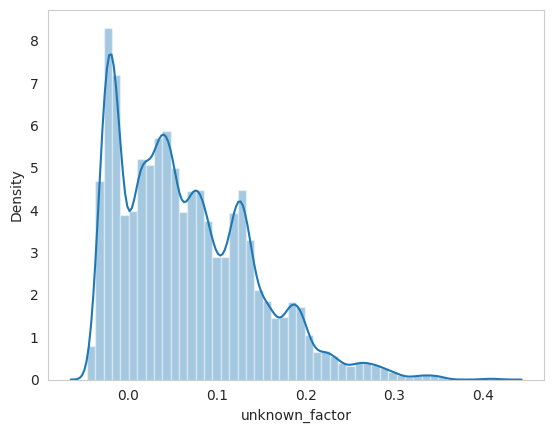

In [46]:
dis_plot = sns.distplot(final_df['unknown_factor'])
dis_plot.grid(False)
plt.show()

In [47]:
data = final_df.drop('Growing_Stress',axis = 1)
f_data = final_df['Growing_Stress']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data,f_data,test_size = 0.2,random_state = 42)
Xtrain.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,unknown_factor
233731,8/28/2014 14:53,Male,Denmark,Student,Yes,Yes,Yes,More than 2 months,Yes,No,Medium,Yes,No,No,Maybe,Yes,0.295735
258201,8/27/2014 20:52,Male,United States,Student,No,No,No,1-14 days,Yes,No,High,Yes,Maybe,Maybe,No,Yes,-0.026557
290440,8/29/2014 17:04,Male,United States,Corporate,No,No,Yes,Go out Every day,No,Yes,Medium,No,Yes,Maybe,No,Yes,-0.017274
288242,8/27/2014 14:49,Male,United States,Others,No,No,Yes,More than 2 months,Maybe,Yes,High,Yes,Yes,No,No,Yes,0.054510
290875,8/28/2014 10:24,Male,United States,Others,No,No,No,1-14 days,No,Yes,Low,No,Maybe,Maybe,No,Not sure,-0.012941


In [48]:
Xtrain.shape

(232040, 17)

In [49]:
Xtest.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,unknown_factor
262820,2/21/2015 8:21,Male,United States,Corporate,No,No,Yes,Go out Every day,Yes,Maybe,High,Yes,Yes,Maybe,No,Yes,-0.016607
58086,8/27/2014 11:56,Male,United Kingdom,Housewife,No,No,No,15-30 days,No,Yes,High,No,Maybe,No,Maybe,No,0.053817
28391,8/28/2014 13:11,Female,United States,Student,No,Yes,Yes,More than 2 months,Maybe,Yes,Medium,No,Maybe,No,No,Not sure,0.128534
128177,8/27/2014 11:41,Male,United States,Housewife,No,No,Yes,15-30 days,Maybe,Maybe,High,No,Yes,Maybe,Maybe,Yes,0.115111
1462,8/27/2014 12:39,Female,United States,Student,No,Yes,No,31-60 days,No,Maybe,Medium,Yes,No,Maybe,No,Not sure,0.139480


In [50]:
Xtest.shape

(58011, 17)

## Decision tree

In [51]:
# Splitting the data into features and labels
data = final_df.drop('Growing_Stress', axis=1)
f_data = final_df['Growing_Stress']

# Identifying numeric and categorical columns
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
#         ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(random_state=42))])

# Splitting the data into training and test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, f_data, test_size=0.2, random_state=42)

# Fitting the model
clf.fit(Xtrain, Ytrain)

# Making predictions
predictions = clf.predict(Xtest)

# Evaluating the model
accuracy = accuracy_score(Ytest, predictions)
conf_matrix = confusion_matrix(Ytest, predictions)
class_report = classification_report(Ytest, predictions)

# Printing the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9829342710865181
Confusion Matrix:
[[19738     0   233]
 [    0 18165   209]
 [  281   267 19118]]
Classification Report:
              precision    recall  f1-score   support

       Maybe       0.99      0.99      0.99     19971
          No       0.99      0.99      0.99     18374
         Yes       0.98      0.97      0.97     19666

    accuracy                           0.98     58011
   macro avg       0.98      0.98      0.98     58011
weighted avg       0.98      0.98      0.98     58011

